### Load data

In [1]:
from scipy.stats import kendalltau
import numpy as np

lda1_data = np.load('./outputs/model1_testResult_LDA.npz')
lda2_data = np.load('./outputs/model2_testResult_LDA.npz')
lda1_labels = lda1_data['testResult_labels']
lda2_labels = lda2_data['testResult_labels']

nmf1_data = np.load('./outputs/model1_testResult_NMF.npz')
nmf2_data = np.load('./outputs/model2_testResult_NMF.npz')
nmf1_labels = nmf1_data['testResult_labels']
nmf2_labels = nmf2_data['testResult_labels']

### LDA

In [2]:
# Compare model 1 and model 2 lda results
# Check if lengths of datasets are equal
lda_tau = []
lda_p_values = []
if len(lda1_labels) != len(lda2_labels):
    print("Error: Data sets are of different lengths.")
else:
    # Calculate Kendall's Tau for each pair of predictions
    for i in range(len(lda1_labels)):
        # Ensure both elements are arrays and have the same length
        if len(lda1_labels[i]) == len(lda2_labels[i]):
            tau, p_value = kendalltau(lda1_labels[i], lda2_labels[i])
            lda_tau.append(tau)
            lda_p_values.append(p_value)
            #print(f"Kendall tau correlation for image {i + 1}: {tau}")
        else:
            print(f"Skipping image {i + 1}: Data length mismatch.")

In [3]:
# Summary Statistics
tau_array = np.array(lda_tau)
#nan_count = np.isnan(tau_array).sum()
#print(f"Number of NaN values in Tau data: {nan_count}")
p_values_array = np.array(lda_p_values)

clean_tau_array = tau_array[~np.isnan(tau_array)]

# Calculate summary statistics for clean data
mean_tau = np.mean(clean_tau_array)
median_tau = np.median(clean_tau_array)
std_tau = np.std(clean_tau_array)
min_tau = np.min(clean_tau_array)
max_tau = np.max(clean_tau_array)

print("LDA Kendall's Tau Summary Statistics after removing NaNs:")
print(f"Mean: {mean_tau}")
print(f"Median: {median_tau}")
print(f"Standard Deviation: {std_tau}")
print(f"Range: {min_tau} to {max_tau}")

LDA Kendall's Tau Summary Statistics after removing NaNs:
Mean: 0.004622630810678664
Median: 0.0
Standard Deviation: 0.4135389268585493
Range: -0.9999999999999999 to 0.9999999999999999


In [4]:
# Analyze p value
# Count the number of significant p-values
significant_count = np.sum(p_values_array < 0.05)
total_count = len(p_values_array)
print(f"Number of statistically significant results: {significant_count} out of {total_count}")

Number of statistically significant results: 155 out of 7431


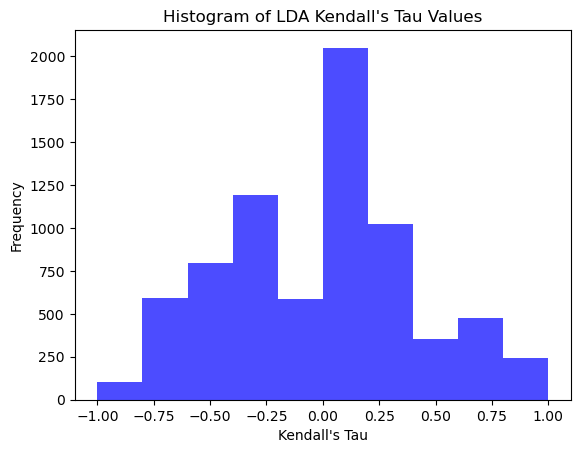

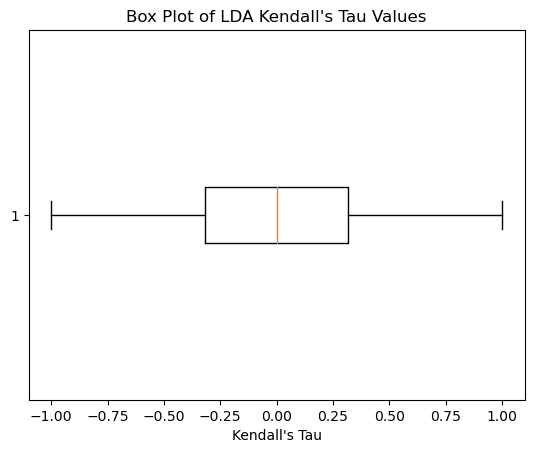

In [5]:
import matplotlib.pyplot as plt

# Histogram of Tau values without NaN
plt.hist(clean_tau_array, bins=10, color='blue', alpha=0.7)
plt.title('Histogram of LDA Kendall\'s Tau Values')
plt.xlabel('Kendall\'s Tau')
plt.ylabel('Frequency')
plt.show()

# Box plot for visual inspection
plt.boxplot(clean_tau_array, vert=False)
plt.title('Box Plot of LDA Kendall\'s Tau Values')
plt.xlabel('Kendall\'s Tau')
plt.show()

### NMF

In [6]:
# Compare model 1 and model 2 lda results
# Check if lengths of datasets are equal
nmf_tau = []
nmf_p_values = []
if len(nmf1_labels) != len(nmf2_labels):
    print("Error: Data sets are of different lengths.")
else:
    # Calculate Kendall's Tau for each pair of predictions
    for i in range(len(nmf1_labels)):
        # Ensure both elements are arrays and have the same length
        if len(nmf1_labels[i]) == len(nmf2_labels[i]):
            new_tau, new_p_value = kendalltau(nmf1_labels[i], nmf2_labels[i])
            nmf_tau.append(new_tau)
            nmf_p_values.append(new_p_value)
            #print(f"Kendall tau correlation for image {i + 1}: {tau}")
        else:
            print(f"Skipping image {i + 1}: Data length mismatch.")

In [7]:
# Summary Statistics
nmf_tau_array = np.array(nmf_tau)
#nan_count = np.isnan(tau_array).sum()
#print(f"Number of NaN values in Tau data: {nan_count}")
nmf_p_values_array = np.array(nmf_p_values)

clean_nmf_tau_array = nmf_tau_array[~np.isnan(nmf_tau_array)]

# Calculate summary statistics for clean data
nmf_mean_tau = np.mean(clean_nmf_tau_array)
nmf_median_tau = np.median(clean_nmf_tau_array)
nmf_std_tau = np.std(clean_nmf_tau_array)
nmf_min_tau = np.min(clean_nmf_tau_array)
nmf_max_tau = np.max(clean_nmf_tau_array)

print("Kendall's Tau Summary Statistics after removing NaNs for NMF:")
print(f"Mean: {nmf_mean_tau}")
print(f"Median: {nmf_median_tau}")
print(f"Standard Deviation: {nmf_std_tau}")
print(f"Range: {nmf_min_tau} to {nmf_max_tau}")

Kendall's Tau Summary Statistics after removing NaNs for NMF:
Mean: 0.0077460864366383116
Median: 0.0
Standard Deviation: 0.4091000878360165
Range: -0.9999999999999999 to 0.9999999999999999


In [8]:
# Analyze p value
# Count the number of significant p-values
nmf_significant_count = np.sum(nmf_p_values_array < 0.05)
total_nmf_count = len(nmf_p_values_array)
print(f"Number of statistically significant results: {nmf_significant_count} out of {total_nmf_count}")

Number of statistically significant results: 154 out of 7431


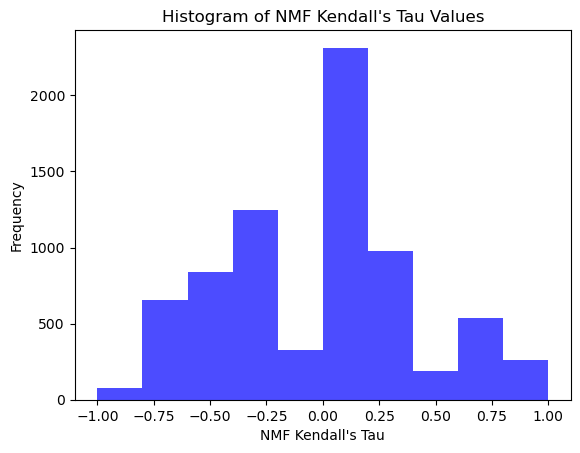

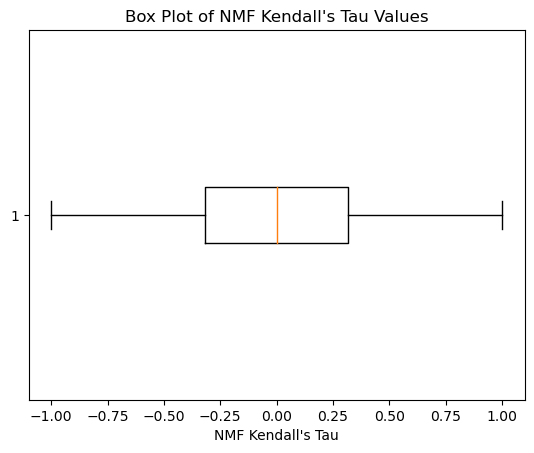

In [9]:
# Histogram of Tau values without NaN
plt.hist(clean_nmf_tau_array, bins=10, color='blue', alpha=0.7)
plt.title('Histogram of NMF Kendall\'s Tau Values')
plt.xlabel('NMF Kendall\'s Tau')
plt.ylabel('Frequency')
plt.show()

# Box plot for visual inspection
plt.boxplot(clean_nmf_tau_array, vert=False)
plt.title('Box Plot of NMF Kendall\'s Tau Values')
plt.xlabel('NMF Kendall\'s Tau')
plt.show()